# Laboratorio 3: Validación Cruzada

- Martínez Ostoa Néstor Iván
- Aprendizaje de Máquina
- LCD, IIMAS, UNAM

---

1. Generar una matriz $X$ de $1000\times 100$ con valores binarios $(0,1)$ siguiendo una distribución uniforme y un vector $Y$ de $1000\times 1$ de la misma forma

2. Encontrar por el método de su preferencia las variables de entrada $(X)$ "relevantes" y ajustar un modelo de clasificación a los datos, $Y=f(X)$, siguiendo un enfoque de validación cruzada con $K=5$

3. Siguiendo un enfoque de validación cruzada con $K=5$. Encontrar por el método de su preferencia las variables de entrada "relevantes" para cada fold y ajustar un modelo de clasificación a los datos, $Y=f(X)$

## Librerías requeridas

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

## Generación de datos

In [104]:
def generate_data():
    X = np.random.uniform(low=0, high=1, size=(1000, 100))
    Y = np.random.randint(low=0, high=2, size=(1000, 1))
    dict_ = dict()
    dict_['Y'] = Y.ravel()
    for i in range(100):
        dict_[f'X_{i+1}'] = X[:, i]
    return pd.DataFrame(dict_)

In [108]:
np.random.seed(69)
df = generate_data()
df.head()

,Y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,0,0.296249,0.809068,0.350253,0.789409,0.561349,0.253589,0.104977,0.058461,0.673292,...,0.427222,0.760398,0.718831,0.617643,0.265429,0.674788,0.189240,0.724260,0.617489,0.605784
1,0,0.690860,0.540351,0.584310,0.604166,0.306813,0.859513,0.067146,0.845677,0.565784,...,0.514934,0.540182,0.622452,0.777176,0.543720,0.149663,0.105057,0.106422,0.137035,0.218607
2,1,0.820886,0.094633,0.157330,0.880167,0.811965,0.353031,0.458137,0.232787,0.626281,...,0.855190,0.494267,0.258415,0.237821,0.179560,0.895320,0.578855,0.417335,0.815119,0.031054
3,0,0.579159,0.403241,0.058733,0.906945,0.118941,0.951547,0.709331,0.800009,0.376076,...,0.866006,0.214181,0.304816,0.439050,0.475755,0.552465,0.690631,0.886792,0.460008,0.365160
4,0,0.146008,0.761136,0.457285,0.855901,0.412994,0.322888,0.677426,0.145169,0.247650,...,0.559460,0.324141,0.886918,0.692577,0.837996,0.193869,0.715556,0.003465,0.456886,0.392147


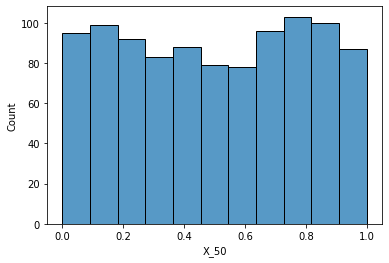

In [109]:
sns.histplot(data=df.iloc[:, 50], legend=0)
plt.show()

## Ejercicio 1

In [120]:
# Data reading
X, Y = df.iloc[:, 1:], df.iloc[:,0]

# Dimensionality reduction
n_components=80
pca = PCA(n_components)
pca.fit(X)
print(f"Porcentaje de varianza explicado con {n_components} componentes: {np.round(np.sum(pca.explained_variance_ratio_),3)}")
new_X = (pca.components_@X.T).T

# K-fold cross validation
scores = []
kf5 = KFold(n_splits=5)
for train_index, test_index in kf5.split(new_X):
    X_train, X_test = new_X.iloc[train_index, :], new_X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # Classification
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print(f"Error promedio: {np.round(np.mean(scores),4)}")

Porcentaje de varianza explicado con 80 componentes: 0.883
Error promedio: 0.528


## Ejercicio 2 

In [121]:
# Data reading
X, Y = df.iloc[:, 1:], df.iloc[:,0]

# K-fold cross validation
scores = []
kf5 = KFold(n_splits=5)
for train_index, test_index in kf5.split(new_X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # Dimensionality reduction
    n_components=80
    pca = PCA(n_components)
    pca.fit(X_train)
    new_X_train = (pca.components_@X_train.T).T
    
    pca = PCA(n_components)
    pca.fit(X_test)
    new_X_test = (pca.components_@X_test.T).T
    
    
    # Classification
    clf = LogisticRegression()
    clf.fit(new_X_train, y_train)
    scores.append(clf.score(new_X_test, y_test))

print(f"Error promedio: {np.round(np.mean(scores),4)}")

Error promedio: 0.503
